21BDA26

EDA of a dataset and Heart Disease Prediction Model Using Logistic Regression

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import plotly.express as px

In [3]:
heart_df = pd.read_csv("framingham.csv")
heart_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [42]:
## Replacing null values with the mean value
heart_df["education"].fillna(heart_df["education"].mean(),inplace=True)
heart_df["cigsPerDay"].fillna(heart_df["cigsPerDay"].mean(),inplace=True)
heart_df["BPMeds"].fillna(heart_df["BPMeds"].mean(),inplace=True)
heart_df["totChol"].fillna(heart_df["totChol"].mean(),inplace=True)
heart_df["BMI"].fillna(heart_df["BMI"].mean(),inplace=True)
heart_df["heartRate"].fillna(heart_df["heartRate"].mean(),inplace=True)
heart_df["glucose"].fillna(heart_df["glucose"].mean(),inplace=True)1

In [43]:
heart_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [44]:
heart_df.describe(include='all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,0.462762,0.326317,0.494101,0.128616,0.02963,0.005899,0.310524,0.025720,0.220240,0.230981,0.369243,0.248716,0.322009,0.118550,0.151958
std,0.495022,0.225583,0.335692,0.500024,0.169703,0.16852,0.076587,0.462763,0.158316,0.075257,0.104199,0.126041,0.098666,0.121466,0.064510,0.359023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.168081,0.158392,0.285714,0.182744,0.242424,0.090395,0.000000
50%,0.000000,0.447368,0.333333,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.215620,0.210402,0.359788,0.239215,0.313131,0.112994,0.000000
75%,1.000000,0.631579,0.666667,1.000000,0.285714,0.00000,0.000000,1.000000,0.000000,0.263158,0.286052,0.443122,0.302896,0.393939,0.127119,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
heart_df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

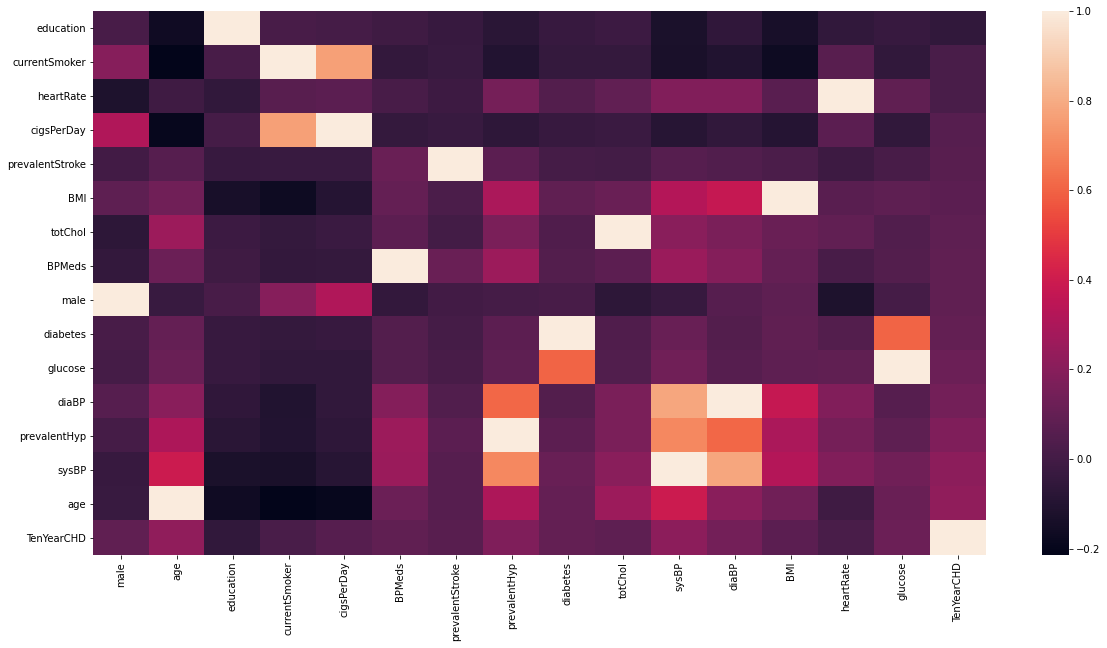

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(heart_df.corr().sort_values(by='TenYearCHD'))

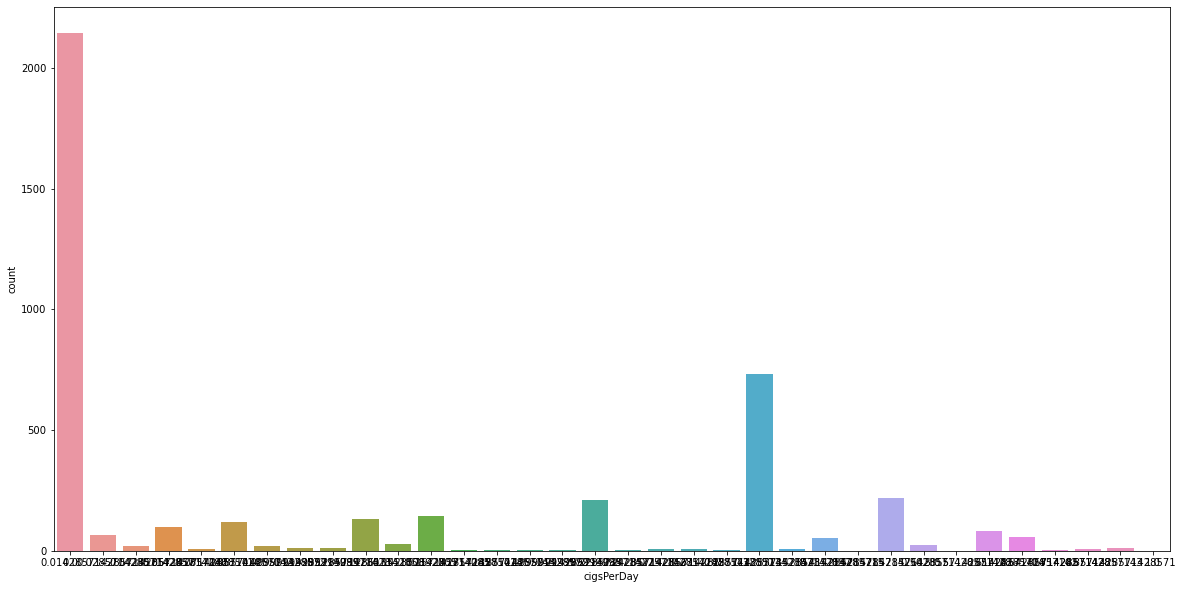

In [50]:
plt.figure(figsize=(20,10))
sns.countplot(x='cigsPerDay',data=heart_df)

Text(0.5, 1.0, 'Cholestrol impact on Heart Rate for female')

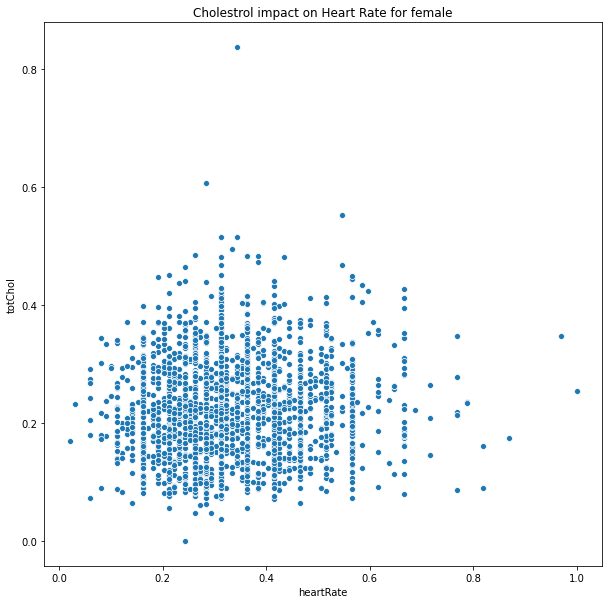

In [52]:
plt.figure(figsize=(10,10))
sns.scatterplot(y = 'totChol', x = 'heartRate',data=heart_df[heart_df.male==0])
plt.title("Cholestrol impact on Heart Rate for female")

In [13]:
numeric_cols = heart_df.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

Model Training

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
from sklearn.metrics import roc_curve , auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [59]:
## Defining variables X,y 
X= heart_df.drop("TenYearCHD",axis=1)
y=heart_df["TenYearCHD"]
print("Columns in X :",X.columns)
print("y :",y)
print("shape of X:",X.shape)
print("shape of y:",y.shape[0])

Columns in X : Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
y : 0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
4233    1.0
4234    0.0
4235    0.0
4236    0.0
4237    0.0
Name: TenYearCHD, Length: 4238, dtype: float64
shape of X: (4238, 15)
shape of y: 4238


In [60]:
## Scaling the data 
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [63]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [66]:
y_pred=model.predict(X_test)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       890
         1.0       0.80      0.05      0.09       170

    accuracy                           0.85      1060
   macro avg       0.82      0.52      0.50      1060
weighted avg       0.84      0.85      0.78      1060



Confusion matrix is 
 [[888   2]
 [162   8]]


Text(42.0, 0.5, 'predicted label')

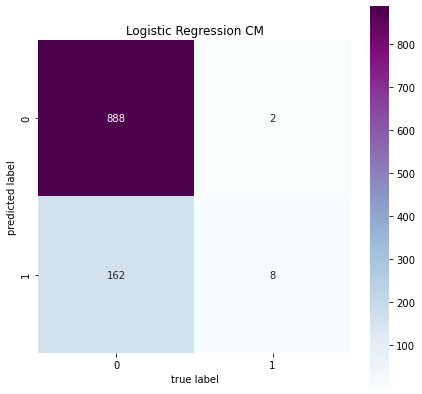

In [74]:
conf_mat=confusion_matrix(y_test,y_pred)
print("Confusion matrix is \n",conf_mat)

## plotting confusion matrix
plt.figure(figsize=(7,7))
plt.title("Logistic Regression CM")
sns.heatmap(conf_mat, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [75]:
print("accuracy:", round(100*accuracy_score(y_test,y_pred)),"%")

accuracy: 85.0 %


In [79]:
y_pred_proba = model.predict_proba(X_test)[:,1]

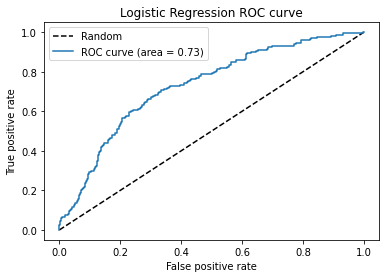

In [80]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc=auc(fpr,tpr)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc='best')

In [82]:
from sklearn import metrics

In [83]:
auc = metrics.roc_auc_score(y_test,y_pred)
print(auc)

0.5224058162590879
